## Predicting heart disease using machine learning

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has a heart disease based on their medical attributes

The following approach will be followed:

1) Scope and Problem Definition
2) Data 
3) Evaluation Criteria
4) Features in Dataset
5) Modelling
6) Experimentation and Evaluation

## 1) Scope:

  - Given a Patient's medical parameters and data, Can we predict whether or not that patient is likely to develop Heart Disease?

## 2) Data 
Dataset acquired from <a href="https://archive.ics.uci.edu/ml/datasets/heart+disease" target="_blank">UCI Heart Disease Datasets: Data Folder: Processed Cleaveland</a>

## 3) Evaluation Criteria
    -  Goal to reach 95% Accuracy for predicting Heart Disease

## 4) Features in Dataset

- age = age in years
- sex = 1: male or 0: female
- cp = chest pain type
- trestbpsresting = blood pressure (in mm Hg)
- cholserum  = cholestoral in mg/dl
- fbs = (fasting blood sugar > 120 mg/dl) (1: true or 0: false)
- restecgresting = electrocardiographic results
- talachmaximum = heart rate achieved
- exangexercise = induced angina (1: yes or 0: no)
- oldpeakST = depression induced by exercise relative to rest
- slope = the slope of the peak exercise ST segment
- ca = number of major vessels (0-3) colored by flourosopy
- thal = 3:normal, 6:fixed defect or 7:reversable defect
- target = 1,2,3,4:Heart Disease or 0: No Heart Disease

## Data Exploration and Wrangling

In [1]:
import pandas as pd
import numpy as np

# Format view function of dataframes to 2 decimals for floats
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Load raw data and create dataframe for further analysis
data = pd.read_csv("processed.cleveland.data", delimiter = ',')
data.columns = ["age","sex","cp","trestbpsresting","cholserum","fbs","restecgresting","talachmaximum","exangexercise","oldpeakST","slope","ca","thal","target"]

In [3]:
data.head()

,age,sex,cp,trestbpsresting,cholserum,fbs,restecgresting,talachmaximum,exangexercise,oldpeakST,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [4]:
# Broad Look at dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              302 non-null    float64
 1   sex              302 non-null    float64
 2   cp               302 non-null    float64
 3   trestbpsresting  302 non-null    float64
 4   cholserum        302 non-null    float64
 5   fbs              302 non-null    float64
 6   restecgresting   302 non-null    float64
 7   talachmaximum    302 non-null    float64
 8   exangexercise    302 non-null    float64
 9   oldpeakST        302 non-null    float64
 10  slope            302 non-null    float64
 11  ca               302 non-null    object 
 12  thal             302 non-null    object 
 13  target           302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [5]:
data['ca'].value_counts()

0.0    175
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [6]:
data['thal'].value_counts()

3.0    166
7.0    117
6.0     17
?        2
Name: thal, dtype: int64

- ca = number of major vessels (0-3) colored by flourosopy
- thal = 3:normal, 6:fixed defect or 7:reversable defect

Due to low number of unknown values (?) present in the dataset, instead of removing the entire row, I am going to assume minimal values as replacements instead.

In [7]:
# Replace unknown values
data["ca"].replace({"?": "0"}, inplace=True)
data["thal"].replace({"?":"3"}, inplace=True)

# # Convert the newly replaced values alongside all other column data to integers
main_cols = ["age","sex","cp","trestbpsresting","cholserum","fbs","restecgresting","talachmaximum","exangexercise","slope","ca","thal","target"]
data[main_cols] = data[main_cols].astype(float).astype(int)

Let's examine the Target Column
     
  - 0 == No Heart Disease
  - 1,2,3,4 == Heart Disease Present
  
For the purpose of this analysis, I will simply examine whether Heart Disease is present or not - therefore, I will convert all "present" values to 1

In [8]:
data['target'].value_counts()

0    163
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [9]:
# Convert any rows in 'Target' that exceed 0, into a standardized "1" for Heart Disease Present
data.loc[data['target'] > 0, 'target'] = 1
data['target'].value_counts()

0    163
1    139
Name: target, dtype: int64

In [10]:
# Import plotting libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Make plots appear inside the notebook
%matplotlib inline 

<AxesSubplot:>

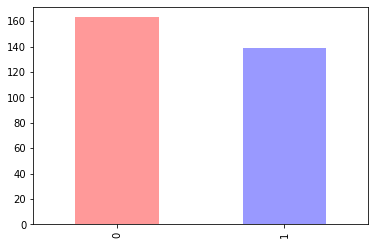

In [11]:
data['target'].value_counts().plot(kind='bar', color=['#FF9999', '#9999FF'])

In [12]:
# Examine data spread statistics
data.describe()

,age,sex,cp,trestbpsresting,cholserum,fbs,restecgresting,talachmaximum,exangexercise,oldpeakST,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.665563,4.718543,0.460265
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.935142,1.940199,0.499246
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### Now that we have examined the data after performing initial data wrangling, let's compare some of these features

   - Is there a correlation between Sex and Heart Disease?
   - What about Age and Heart rate?
   - Heart Disease and different types of chest pain?

### Sex Vs Heart Disease Diagnosis

In [13]:
# Male = 1, Female = 0
data['sex'].value_counts()

1    205
0     97
Name: sex, dtype: int64

target   0    1
sex            
0       72   25
1       91  114 



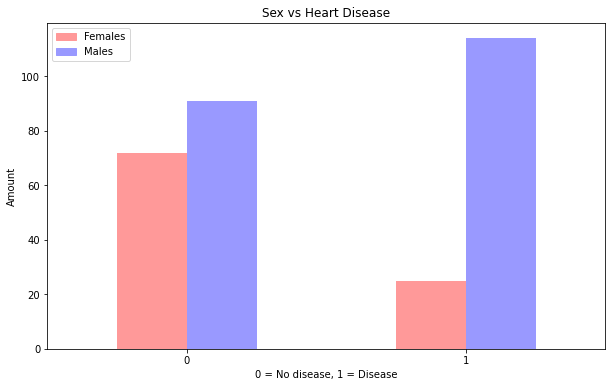

In [14]:
# Let's see how the gender lines up with a positive heart disease diagnosis
print(pd.crosstab(data['sex'], data['target']),"\n")

# Create a plot of crosstab
pd.crosstab(data.target, data.sex).plot(kind = 'bar',
                                        figsize=(10,6),
                                        color=['#FF9999', '#9999FF'])

plt.title('Sex vs Heart Disease')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Amount')
plt.xticks(rotation=0)
female = mpatches.Patch(color='#FF9999', label='Females')
male = mpatches.Patch(color='#9999FF', label='Males')
plt.legend(handles=[female,male])
plt.show()

We can see from the initial data that about 25% (1 in 4) of females have been diagnosed with heart disease compared to 50% (1 in 2) for all males

### Age Vs Heart Rate for Disease Diagnosis

- talachmaximum == Maximum Heart Rate
- age == years old
- target == Heart Disease(1) or Healthy (0)

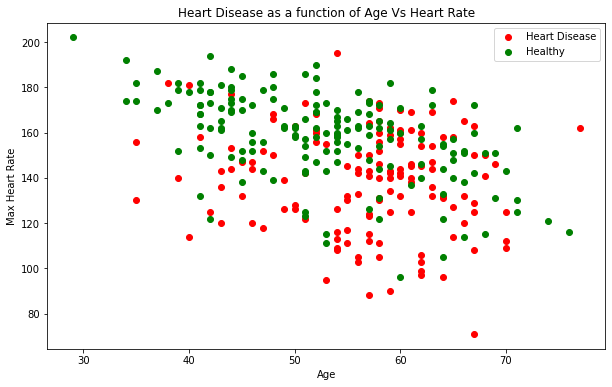

In [15]:
# Let's examine this utilizing a scatterplot to identify the spread between diseased vs healthy cases
plt.figure(figsize=(10,6))

# Diseased
plt.scatter(data['age'][data.target==1],
            data['talachmaximum'][data.target==1],
            c='Red')
# Healthy
plt.scatter(data['age'][data.target==0],
            data['talachmaximum'][data.target==0],
            c ='Green')


plt.title('Heart Disease as a function of Age Vs Heart Rate')
plt.xlabel("Age")
plt.ylabel('Max Heart Rate')
plt.legend(['Heart Disease', 'Healthy'])
plt.show()

- Possible Skew in data due to outliers on each side of scatterplot:
    - let's check the distribution of results using a histogram to be sure

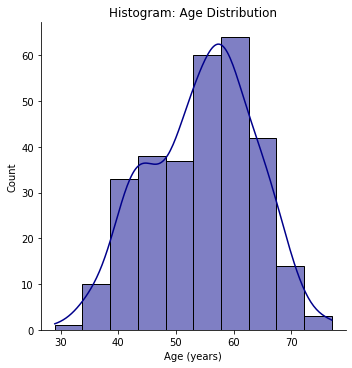

In [16]:
# Bin number selected for age 100 in 10 year range
sns.displot(data['age'], kde=True, 
             bins=int(100/10),color='darkblue')
             
plt.title('Histogram: Age Distribution')
plt.xlabel('Age (years)')
plt.show()

### What about the Type of Chest Pain Vs Disease Diagnosis?

- cp == Chest Pain types(1,2,3,4)
- target == Heart Disease(1) or Healthy (0)

In [17]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
1,15,7
2,41,9
3,68,18
4,39,105


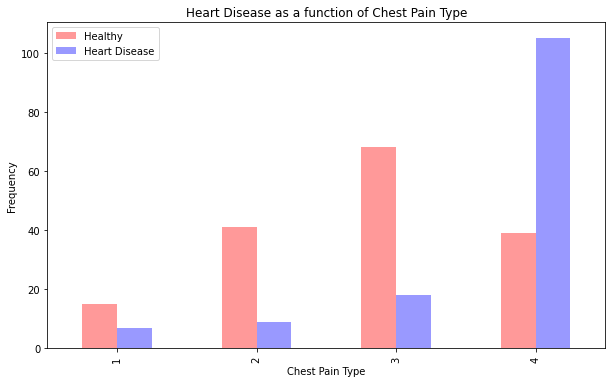

In [18]:
pd.crosstab(data.cp, data.target).plot(kind='bar',
                                       figsize=(10,6),
                                       color=['#FF9999', '#9999FF'])

plt.title('Heart Disease as a function of Chest Pain Type')
plt.xlabel("Chest Pain Type")
plt.ylabel('Frequency')
plt.legend(['Healthy','Heart Disease'])
plt.show()

We can see clearly that there is a high number of positive disease diagnosis' associated with patients experiencing type 4 chest pain

Let's examine further possible correlations using a Matrix Heatmap

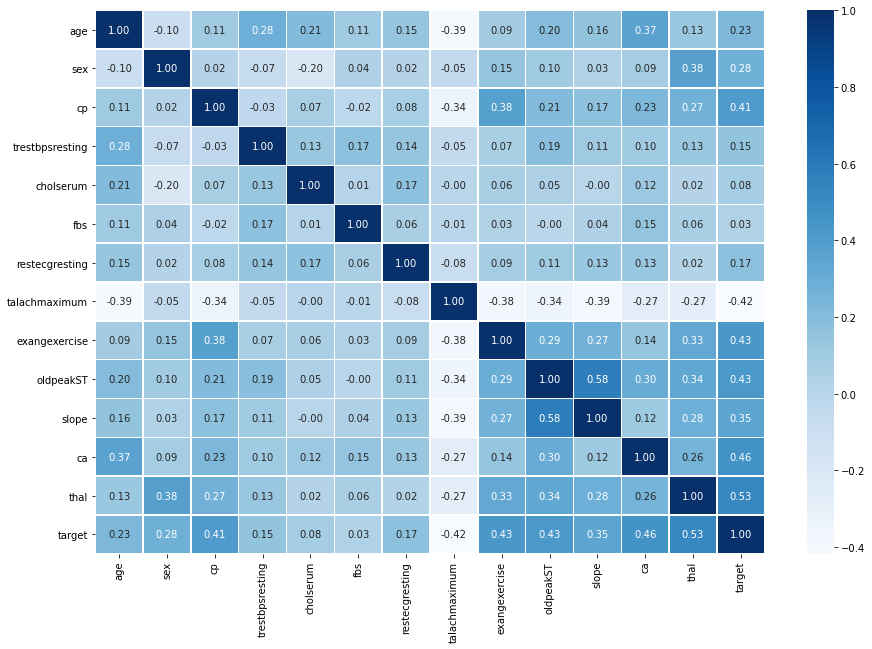

In [19]:
matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="Blues")
plt.yticks(rotation=0)
plt.show()

#### Things to Note Regarding Heatmap Visualization:

- A high positive value indicates a strong, positive correlation between variables (Ex. As Chest Pain (CP) increases, so too does Target(Diseased))
- A high negative value indicates a strong, negative correlation between variables (Ex. Max Heart Rate Achieved (talachmaximum) & Target(Diseased) 
    - which indicates that the higher the maximum heart rate for a patient is, the lower the likelihood of having heart disease, which makes sense because healthy hearts can hit higher pump volumes

## Machine Learning & AI Modelling

Now that I have examined some baseline statistics, wrangled some values, visualized some relationships between features, and determined that the data is suitably structured -  I can prepare to train a model to identify heart disease

I will be evaluating 3 different Models on this dataset:

1) Random Forest Classifier
2) Logistic Regression
3) K-Nearest Neighbors Classifier

In [20]:
# Import libraries for data preparation
from sklearn.model_selection import train_test_split

# Split Data
X = data.drop('target',axis=1)
Y = data['target']

# Split into training/test sets: 70/30 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42, stratify=Y)

Let's take a quick look at the split data's details to ensure proper data-scaling applications

In [21]:
X_train.describe()

,age,sex,cp,trestbpsresting,cholserum,fbs,restecgresting,talachmaximum,exangexercise,oldpeakST,slope,ca,thal
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,54.622407,0.701245,3.170124,130.983402,249.672199,0.149378,0.954357,149.526971,0.327801,0.987552,1.580913,0.634855,4.780083
std,8.928568,0.458665,0.953120,17.765830,52.379986,0.357202,1.001037,23.034763,0.470389,1.141751,0.614655,0.907991,1.957192
min,34.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.600000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,168.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,195.000000,1.000000,6.200000,3.000000,3.000000,7.000000


There is an observable spread in the distribution of values between the features. We will need to apply scaling before training different types of models

### Random Forest

Given the nature of the data as well as what we are trying to get our model to analyze correctly - I would like to initially examine the Random Forest Algorithm, which does not require data scaling as a preprocessing step

In [22]:
# Import Necessary library
from sklearn.ensemble import RandomForestClassifier

# Initialize Classifier
rdmfor_model = RandomForestClassifier()

In [23]:
# Next, Fit the model on our training data
rdmfor_model.fit(X_train,y_train)

# Then let's take a look at the resulting performance scores on the test data
rdmfor_score = rdmfor_model.score(X_test, y_test)
print(f"Random Forest Model Accuracy: {rdmfor_score}")

Random Forest Model Accuracy: 0.9016393442622951


Not bad for a baseline model - but let's evaluate how the Log Regression and KNN models perform in comparison

### Logistic Regression
- Logistic Regression assumes a Gaussian Distribution and therefore, benefits more from Standardization (aka Z-score normalization)
- I am standardizing all of the numerical features (Excluding categorically encoded(0 or 1) features to prevent applying a distribution to them)

In [24]:
# Import required libraries for Data Standardization
from sklearn.preprocessing import StandardScaler

# Copy of Datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# Numerical Features
num_cols = ["age","cp","trestbpsresting","cholserum","restecgresting","talachmaximum","oldpeakST","slope","ca","thal"]

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    standardizer = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = standardizer.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = standardizer.transform(X_test_stand[[i]])

In [25]:
# Examine how standardization has affected our data after transformation
X_train_stand.describe()

,age,sex,cp,trestbpsresting,cholserum,fbs,restecgresting,talachmaximum,exangexercise,oldpeakST,slope,ca,thal
count,2.410000e+02,241.000000,2.410000e+02,2.410000e+02,2.410000e+02,241.000000,2.410000e+02,2.410000e+02,241.000000,2.410000e+02,2.410000e+02,2.410000e+02,2.410000e+02
mean,2.506064e-16,0.701245,1.953255e-16,7.886730e-16,-8.107853e-17,0.149378,-8.476392e-17,2.266513e-16,0.327801,-5.194093e-17,1.423481e-16,6.449428e-17,5.159543e-17
std,1.002081e+00,0.458665,1.002081e+00,1.002081e+00,1.002081e+00,0.357202,1.002081e+00,1.002081e+00,0.470389,1.002081e+00,1.002081e+00,1.002081e+00,1.002081e+00
min,-2.314517e+00,0.000000,-2.281603e+00,-2.086048e+00,-2.365972e+00,0.000000,-9.553525e-01,-3.416158e+00,0.000000,-8.667455e-01,-9.470708e-01,-7.006417e-01,-9.114013e-01
25%,-7.432534e-01,0.000000,-1.788637e-01,-6.195185e-01,-7.015756e-01,0.000000,-9.553525e-01,-7.624757e-01,0.000000,-8.667455e-01,-9.470708e-01,-7.006417e-01,-9.114013e-01
50%,1.546116e-01,1.000000,-1.788637e-01,-5.546879e-02,-8.938381e-02,0.000000,-9.553525e-01,1.510872e-01,0.000000,-3.401430e-01,6.832439e-01,-7.006417e-01,-9.114013e-01
75%,7.157773e-01,1.000000,8.725060e-01,5.085809e-01,5.228080e-01,0.000000,1.046734e+00,8.036321e-01,1.000000,5.375279e-01,6.832439e-01,4.029835e-01,1.136596e+00
max,2.511507e+00,1.000000,8.725060e-01,3.892879e+00,6.013403e+00,1.000000,1.046734e+00,1.978213e+00,1.000000,4.574814e+00,2.313559e+00,2.610234e+00,1.136596e+00


In [26]:
# Import Sklearn Library for Log Regression tools
from sklearn.linear_model import LogisticRegression

# Instantiate Regression model
logreg_model = LogisticRegression()
print(logreg_model.get_params(),'\n')
# Fit model on standardized data and make predictions
logreg_model.fit(X_train_stand,y_train)
log_pred = logreg_model.predict(X_test_stand)

# Calculate Accuracy of trained model on unseen data
logreg_score = logreg_model.score(X_test_stand,y_test)
print(f"Logistic Regression Model Accuracy: {logreg_score}")

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 

Logistic Regression Model Accuracy: 0.9344262295081968


### K-Nearest Neighbours Classifier
- KNN-Classifier will be used instead of KNN-Regressor because we are determining either a yes(1) or no(0) response. KNN-Regressor works ideally with continuous variability.
- KNN also utilizes Euclidean Distance as it's default normalizer and sets the scale range between [0,1] which is suitable in the case of our data
- When scaling the data, there is no need to exclude categorically encoded data (1 or 0) as those feature values sit within the Euclidean Space

In [27]:
# Import required libraries for Data Normalization
from sklearn.preprocessing import MinMaxScaler

# Fit scaler on train data
scaler = MinMaxScaler().fit(X_train)

# Transform training datasets
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [28]:
# Import Sklearn Library for KNN-Classifier tools
from sklearn.neighbors import KNeighborsClassifier

# Instantiate model with default 5 neighbour search
# This means that a new datapoint is labelled by majority of at least 3 of the nearest points
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit model on normalized training dataset and target data
knn_model.fit(X_train_norm,y_train)

# Evaluate model accuracy on normalized test data
knn_score = knn_model.score(X_test_norm,y_test)
print(f"K-NN Classifier Model Accuracy: {knn_score}")

K-NN Classifier Model Accuracy: 0.8852459016393442


In [29]:
# Store all results 
scores = {"RandomForest":rdmfor_score, "Log Regression":logreg_score, "K-NN Classifier": knn_score}

# Create Dataframe and view Results
df_scores = pd.DataFrame.from_dict(scores, orient='index',columns=['Accuracy Score'])
df_scores

,Accuracy Score
RandomForest,0.901639
Log Regression,0.934426
K-NN Classifier,0.885246


Now that I've examined 3 baseline models, it is time to consider some Hyperparameter tuning for them

### Log Regression Hyperparameter Tuning

- penalty: L2 (Ridge) Regularization is optimal given that we do not have a significant number of features & are assuming they all play a role in determining Heart Disease
- dual: The dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features
- max_iter: Max num of iterations for convergence

In [30]:
print(X_train_stand.shape, y_train.shape)

(241, 13) (241,)


In [31]:
# Import GridSearch and Time Measurement Library tools
import time
from sklearn.model_selection import GridSearchCV

# Establish Gridsearch parameters
solver=['lbfgs','newton-cg']
C=[0.50,1.0,1.50,2.0,2.50]
max_iter=[50,100,150,200,250,300,350]
param_grid = dict(solver=solver, max_iter=max_iter, C=C)


# Re-initialize model with modified hyperparameters
lr = LogisticRegression(penalty='l2',)
grid = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Establish Training start time
start_time = time.time()
# Gridsearch using specified grid hyperparameters
grid_result = grid.fit(X_train_stand,y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.817177 using {'C': 0.5, 'max_iter': 50, 'solver': 'lbfgs'}
Execution time: 3.2343873977661133 ms


- The above accuracy score is based off of the GridsearchCV's 5-fold stratified cross validation. The result is a test score on the withheld train data and not the actual previously split test data. As such, the resulting score will, of course, not be the same value.

In [32]:
best_log_model = grid_result.best_estimator_
print(best_log_model)
print(f"GridSearch Log Regression Model Accuracy Score: {best_log_model.score(X_test_stand, y_test)}")

LogisticRegression(C=0.5, max_iter=50)
GridSearch Log Regression Model Accuracy Score: 0.9344262295081968


In [37]:
# Import RandomizedSearch library tools
from sklearn.model_selection import RandomizedSearchCV

# Re-run Hyperparameter tuning using RandomizedSearchCV instead of GridSearch
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid,scoring='accuracy', cv = 5, n_jobs=-1)
start_time = time.time()
random_result = random.fit(X_train_stand,y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms','\n')

random_log_model = random_result.best_estimator_
print(random_log_model)
print(f"RandomizedSearch Log Regression Model Accuracy Score: {random_log_model.score(X_test_stand, y_test)}")

Best: 0.817177 using {'solver': 'lbfgs', 'max_iter': 200, 'C': 0.5}
Execution time: 0.13193368911743164 ms 

LogisticRegression(C=0.5, max_iter=200)
RandomizedSearch Log Regression Model Accuracy Score: 0.9344262295081968


- While the performance score did not change at all in terms of accuracy between GridSearch and RandomizedSearch, the RandomizedSearch option performs with significantly lower execution time and should be noted.

### Random Forest Hyperparameter Tuning

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve